### Import Libraries

In [37]:
from IPython.display import clear_output

In [38]:
!pip install transformers
!pip install easyocr
clear_output()

In [39]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [40]:
plt.style.use('dark_background')

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

### Read image document and detect the text using EasyOCR

Rendang
is
a
Minang dish originat
from the Minangkabau
region
in
West Sumatra,
Indonesia_
It
has  spread
across
Indonesian
cuisine
to
the cuisines
of neighbouring
Southeast
Asian
countries
such
as
Malaysia, Singapore,
Brunei
and
the Philippines _
Rendang
is
often described
as
a
rich
dish
of
meat
most commonly beef (rendang daging)
that
has
been
slow cooked
and
braised
in
a
coconut milk seasoned with
a
herb and
spice
mixture,
until
the liquids evaporate and
the
meat
turns
dark
brown
and tender ,
becoming
caramelized
and
infused
with
rich
flavours
ing


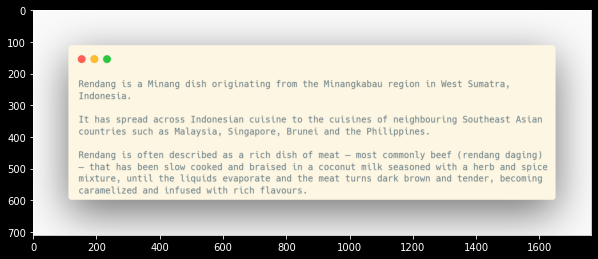

In [41]:
img = cv2.imread('test.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
reader = easyocr.Reader(['en'], gpu=True)
result = reader.readtext(img)
result

data = []

for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    data.append(text)
    print(text)
    
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [42]:
data

['Rendang',
 'is',
 'a',
 'Minang dish originat',
 'from the Minangkabau',
 'region',
 'in',
 'West Sumatra,',
 'Indonesia_',
 'It',
 'has  spread',
 'across',
 'Indonesian',
 'cuisine',
 'to',
 'the cuisines',
 'of neighbouring',
 'Southeast',
 'Asian',
 'countries',
 'such',
 'as',
 'Malaysia, Singapore,',
 'Brunei',
 'and',
 'the Philippines _',
 'Rendang',
 'is',
 'often described',
 'as',
 'a',
 'rich',
 'dish',
 'of',
 'meat',
 'most commonly beef (rendang daging)',
 'that',
 'has',
 'been',
 'slow cooked',
 'and',
 'braised',
 'in',
 'a',
 'coconut milk seasoned with',
 'a',
 'herb and',
 'spice',
 'mixture,',
 'until',
 'the liquids evaporate and',
 'the',
 'meat',
 'turns',
 'dark',
 'brown',
 'and tender ,',
 'becoming',
 'caramelized',
 'and',
 'infused',
 'with',
 'rich',
 'flavours',
 'ing']

In [43]:
listToStr = ' '.join([str(elem) for elem in data]) 

In [44]:
print(listToStr)  

Rendang is a Minang dish originat from the Minangkabau region in West Sumatra, Indonesia_ It has  spread across Indonesian cuisine to the cuisines of neighbouring Southeast Asian countries such as Malaysia, Singapore, Brunei and the Philippines _ Rendang is often described as a rich dish of meat most commonly beef (rendang daging) that has been slow cooked and braised in a coconut milk seasoned with a herb and spice mixture, until the liquids evaporate and the meat turns dark brown and tender , becoming caramelized and infused with rich flavours ing


### Question Answering System using BERT

In [45]:
def get_answer_using_bert(question, reference_text):
    # Load fine-tuned model for QA
    bert_model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

    # Load Vocab as well
    bert_tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

    # Apply bert_tokenizer on input text
    input_ids = bert_tokenizer.encode(question, reference_text)
    input_tokens = bert_tokenizer.convert_ids_to_tokens(input_ids)

    # Search index of first [SEP] token
    sep_location = input_ids.index(bert_tokenizer.sep_token_id)
    first_seg_len, second_seg_len = sep_location + 1, len(input_ids) - (sep_location + 1)
    seg_embedding = [0] * first_seg_len + [1] * second_seg_len

    # Run our example on model
    model_scores = bert_model(torch.tensor([input_ids]), token_type_ids=torch.tensor([seg_embedding]))
    ans_start_loc, ans_end_loc = torch.argmax(model_scores[0]), torch.argmax(model_scores[1])
    result = ' '.join(input_tokens[ans_start_loc:ans_end_loc + 1])

    # Return final result
    result = result.replace(' ##', '')
    return result

### Predicting from the image document

In [48]:
if __name__=="__main__":
    reference_text = listToStr
    question = input('Your question? \n \n')
    print(get_answer_using_bert(question, reference_text))

Your question? 
 
explain in long sentence how rendang is usually cooked
slow cooked and braised in a coconut milk seasoned with a herb and spice mixture
